In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [137]:
url = "https://raw.githubusercontent.com/Anushka0510/Heart-Disease-Predictor/main/dataset_heart.csv"

df = pd.read_csv(url)
df.columns = df.columns.str.strip()

df.head()


,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


In [138]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

,0
age,0
sex,0
chest pain type,0
resting blood pressure,0
serum cholestoral,0
fasting blood sugar,0
resting electrocardiographic results,0
max heart rate,0
exercise induced angina,0
oldpeak,0


/tmp/ipython-input-3382163592.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["heart disease"], palette=["#6A5ACD", "#FF7F50"])


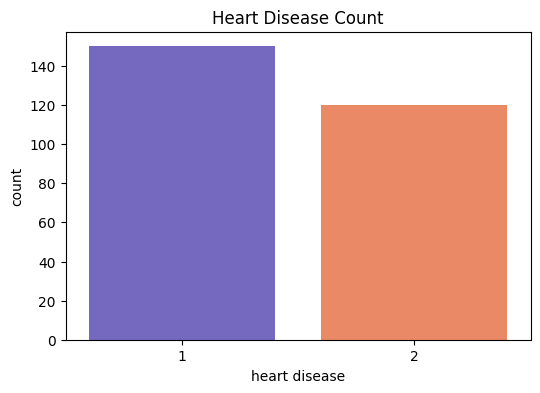

In [139]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["heart disease"], palette=["#6A5ACD", "#FF7F50"])
plt.title("Heart Disease Count")
plt.show()


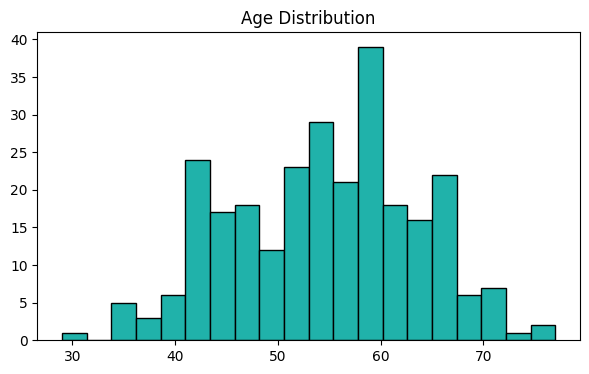

In [140]:
plt.figure(figsize=(7,4))
plt.hist(df["age"], bins=20, color="#20B2AA", edgecolor="black")
plt.title("Age Distribution")
plt.show()


/tmp/ipython-input-3112043815.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["sex"], palette=["#6495ED", "#FF69B4"])


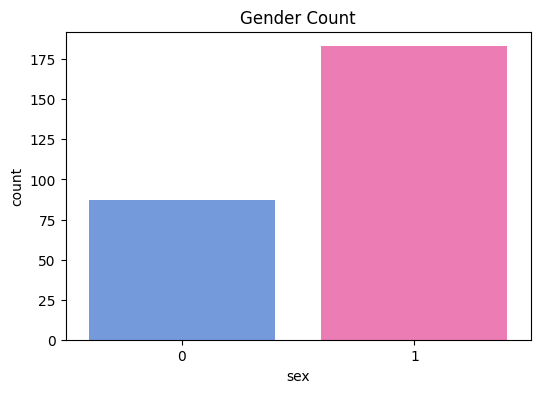

In [141]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["sex"], palette=["#6495ED", "#FF69B4"])
plt.title("Gender Count")
plt.show()


In [142]:
X = df.drop("heart disease", axis=1)
y = df["heart disease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [143]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [144]:
model = LogisticRegression(max_iter=800)
model.fit(X_train, y_train)

pred = model.predict(X_test)
acc = accuracy_score(y_test, pred)

print("Accuracy:", round(acc * 100, 2), "%")


Accuracy: 90.74 %


In [145]:
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           1       0.91      0.94      0.93        33
           2       0.90      0.86      0.88        21

    accuracy                           0.91        54
   macro avg       0.91      0.90      0.90        54
weighted avg       0.91      0.91      0.91        54



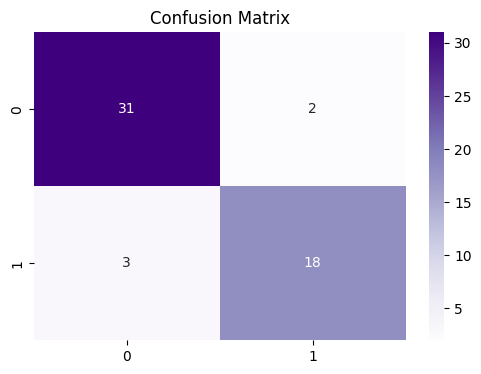

In [146]:
cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix")
plt.show()


In [147]:
print("Enter details:\n")

person = {
    "age": float(input("Age: ")),
    "sex": int(input("Male=1, Female=0: ")),
    "chest pain type": int(input("Chest discomfort level (1-4): ")),
    "resting blood pressure": float(input("Blood pressure: ")),
    "serum cholestoral": float(input("Cholesterol: ")),
    "fasting blood sugar": int(input("High blood sugar? (1/0): ")),
    "resting electrocardiographic results": int(input("ECG value (0-2): ")),
    "max heart rate": float(input("Highest heart rate reached: ")),
    "exercise induced angina": int(input("Chest discomfort during exercise (1/0): ")),
    "oldpeak": float(input("Discomfort increase when active: ")),
    "ST segment": int(input("Heart strain level (1-2): ")),
    "major vessels": int(input("Number of blocked vessels (0-3): ")),
    "thal": int(input("Thal value (1-7): "))
}

person_df = pd.DataFrame([person])
person_scaled = scaler.transform(person_df)

prob = model.predict_proba(person_scaled)[0][1]
pred = model.predict(person_scaled)[0]

print("\nRisk Percentage:", round(prob * 100, 2), "%")

if pred == 1:
    print("Result: Lower chance of heart risk")
else:
    print("Result: Higher chance of heart risk")


Enter details:

Age: 67
Male=1, Female=0: 1
Chest discomfort level (1-4): 4
Blood pressure: 160
Cholesterol: 564
High blood sugar? (1/0): 1
ECG value (0-2): 2
Highest heart rate reached: 181
Chest discomfort during exercise (1/0): 1
Discomfort increase when active: 3.6
Heart strain level (1-2): 2
Number of blocked vessels (0-3): 3
Thal value (1-7): 7

Risk Percentage: 99.86 %
Result: Higher chance of heart risk
